In [48]:
# math & tables module
import numpy as np
import pandas as pd

# plotting module
from matplotlib import pyplot as plt
import seaborn as sns

# module to show version used in project
import session_info

# statistics module
from scipy import stats as st
import statsmodels.stats.proportion as sp

# imputer method using KNN
from sklearn.impute import KNNImputer

In [45]:
# session module version
session_info.show()

In [33]:
# reading dataset
data = pd.read_csv("train.csv", sep=';')

In [34]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Cleaning

### Handle Missing Values
from descriptive statistics shown that there are 4 column contain missing-values but not in form of null-values, however in form of value of 'unknown' & 'other' in 4 column named: *job, education, contact, poutcome*

#### Job Variable

In [35]:
# Handling missing values in job column using frequent values replacing method
data.job.value_counts().to_frame().T

job,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student,unknown
count,9732,9458,7597,5171,4154,2264,1579,1487,1303,1240,938,288


In [36]:
# replacing the unknown values using the most values containing column (mode) which 'blue-collar'
data.job.replace(to_replace='unknown', value=data.job.mode()[0], inplace=True)
data.job.value_counts().to_frame().T

job,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student
count,10020,9458,7597,5171,4154,2264,1579,1487,1303,1240,938


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Education Variable

In [37]:
# Handling missing values in education column using frequent values replacing method
data.education.value_counts().to_frame().T

education,secondary,tertiary,primary,unknown
count,23202,13301,6851,1857


In [38]:
data.education.replace(to_replace='unknown', value=data.education.mode()[0], inplace=True)
data.education.value_counts().to_frame().T

education,secondary,tertiary,primary
count,25059,13301,6851


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Contact Variable

In [39]:
# Handling missing values in contact column using frequent values replacing method
data.contact.value_counts().to_frame().T

contact,cellular,unknown,telephone
count,29285,13020,2906


In [40]:
data.contact.replace(to_replace='unknown', value=data.contact.mode()[0], inplace=True)
data.contact.value_counts().to_frame().T

contact,cellular,telephone
count,42305,2906


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Poutcome Variable

In [49]:
data.poutcome.value_counts().to_frame().T

poutcome,unknown,failure,other,success
count,36959,4901,1840,1511


### Handle Duplicated Data

In [13]:
data.duplicated().sum()

0

There are no duplication shown from the dataset analyse from all the column

### Handle Outliers

In [15]:
numerical = ['age','balance','day','duration','campaign','pdays','previous']

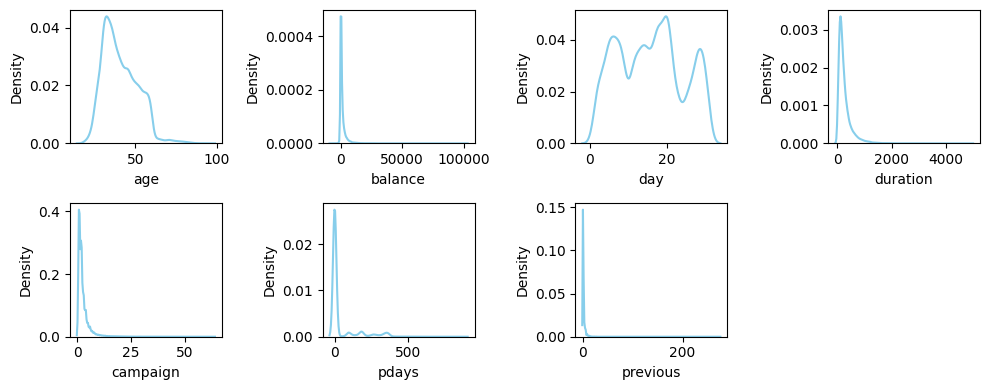

In [16]:
feature = numerical

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.kdeplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

In [22]:
data_used = data

In [23]:
z_scores = np.abs(st.zscore(data_used['age']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries
data_used = data_used.query("filtered_entries == True")

In [26]:
z_scores = np.abs(st.zscore(data_used['balance']))
data_used.loc[:,['abs_zscore']] = z_scores

filtered_entries = (z_scores < 3)
data_used.loc[:,['filtered_entries']] = filtered_entries
data_used = data_used.query("filtered_entries == True")

In [27]:
z_scores = np.abs(st.zscore(data_used['duration']))
data_used.loc[:,['abs_zscore']] = z_scores

filtered_entries = (z_scores < 3)
data_used.loc[:,['filtered_entries']] = filtered_entries
data_used = data_used.query("filtered_entries == True")

In [28]:
z_scores = np.abs(st.zscore(data_used['campaign']))
data_used.loc[:,['abs_zscore']] = z_scores

filtered_entries = (z_scores < 3)
data_used.loc[:,['filtered_entries']] = filtered_entries
data_used = data_used.query("filtered_entries == True")

In [29]:
z_scores = np.abs(st.zscore(data_used['pdays']))
data_used.loc[:,['abs_zscore']] = z_scores

filtered_entries = (z_scores < 3)
data_used.loc[:,['filtered_entries']] = filtered_entries
data_used = data_used.query("filtered_entries == True")

In [30]:
z_scores = np.abs(st.zscore(data_used['previous']))
data_used.loc[:,['abs_zscore']] = z_scores

filtered_entries = (z_scores < 3)
data_used.loc[:,['filtered_entries']] = filtered_entries
data_used = data_used.query("filtered_entries == True")

In [32]:
data_used.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,abs_zscore,filtered_entries
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,no,0.226537,True
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,no,0.226537,True
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,no,0.226537,True
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,no,0.226537,True
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,no,0.226537,True


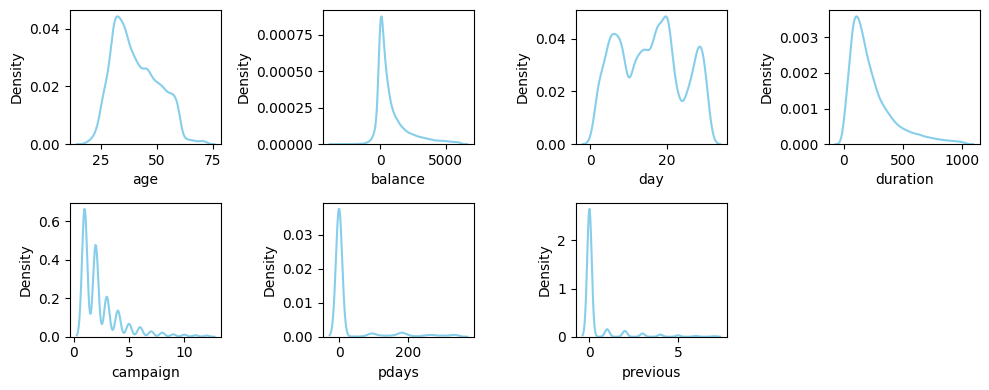

In [33]:
feature = numerical

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.kdeplot(x=data_used[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

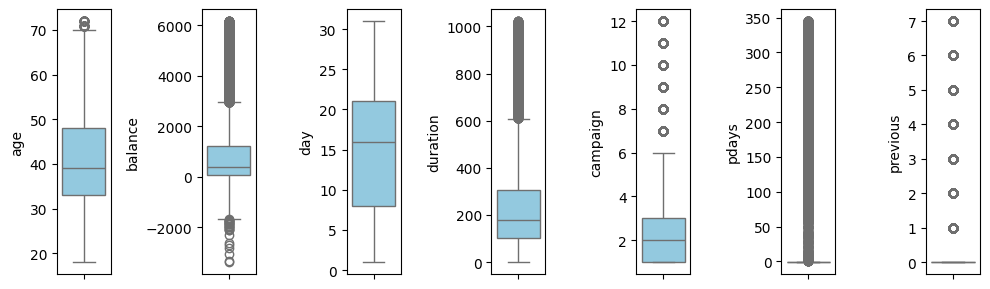

In [34]:
feature = numerical

plt.figure(figsize=(10,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.boxplot(y=data_used[feature[i]], color='skyblue', orient='v')
    plt.tight_layout()

## Feature Engineering